In [1]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [2]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [3]:
data = r'data/spotify_okinawa_edgelist.csv'

df = pd.read_csv(data)
df.head()

,source,target
0,Namie Amuro,Jolin Tsai
1,Orange Range,Rockit Music
2,Orange Range,ORANGE RANGE
3,Orange Range,Benny Dayal
4,Southern Allstars,Louis Armstrong


In [4]:
G = nx.from_pandas_edgelist(df)

# drop the seed nodes; we will have proper names from pages found
seed_nodes = ['network science', 'social network analysis', 'graph theory', 'causal inference']
G.remove_nodes_from(seed_nodes)

In [5]:
print(nx.info(G))

Graph with 226 nodes and 234 edges


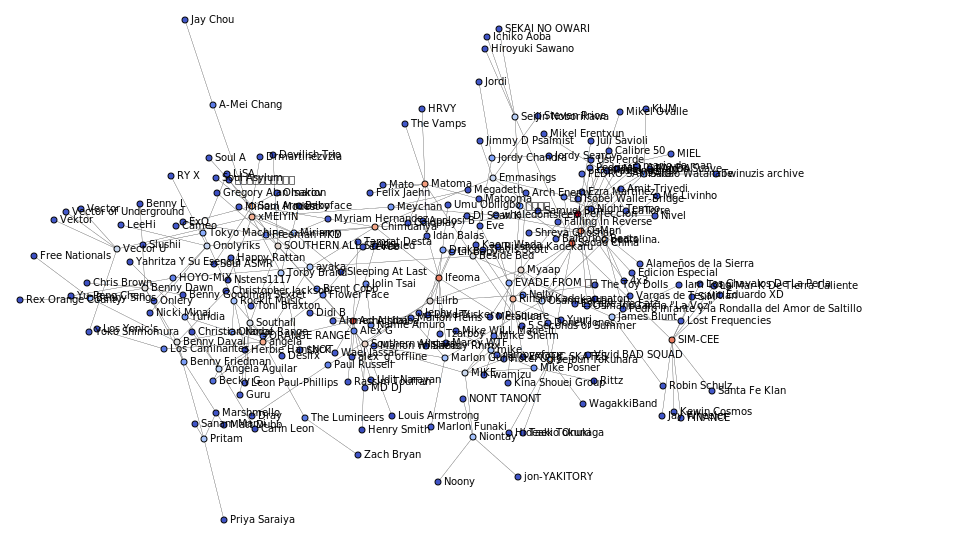

In [6]:
# this is network analysis network without labels

draw_graph(G, node_size=3, show_names=True, edge_width=0.3)

# Egocentric Network Analysis

As the above visualization shows, this is a complex network. For knowledge discovery, we should use Egocentric Network Analysis to "zoom in" on nodes of interest. Any node can be looked at, but I am going to programmatically do this, in this notebook, showing only the top twenty nodes, according to page rank.

# PageRank - Identify Nodes of Interest

In [7]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Perfeccion,0.022979
Achichiba,0.020685
Ifeoma,0.018887
SIM-CEE,0.018747
OsMan,0.018253
Matoma,0.017006
Sadao China,0.016195
Rinsho Kadekaru,0.015566
Soul Armoniko,0.014785
angela,0.014048


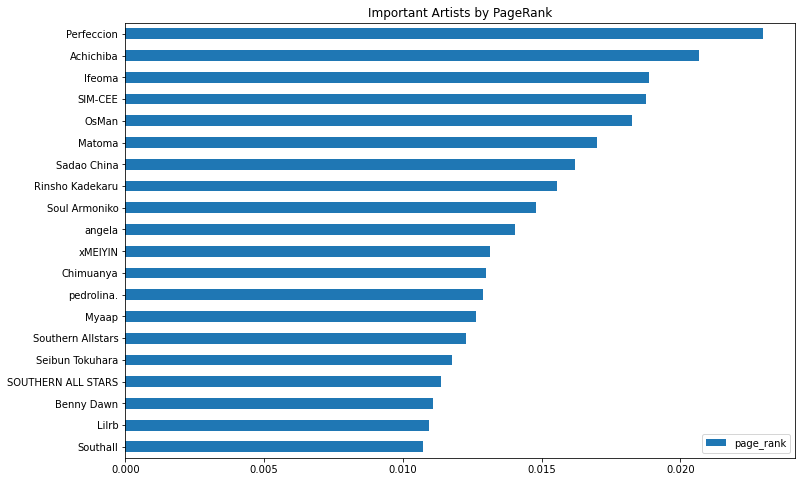

In [8]:
title = 'Important Artists by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

# Egocentric Network Analysis
Next, let's look at the Ego Graphs for each of the top ten characters found by PageRank. Before visualizing and inspecting the Ego Graphs, let's create a Python list so that we can more easily look through them without explicitely typing their names.

In [9]:
top_nodes = pr_df.head(20).index.values

In [10]:
top_nodes[0]

'Perfeccion'

Now we are all set to start looking through them, in order of importance.

## Top Node Ego Networks
Unlike last time, I am not going to drop the center node or write about findings. This is purely discovery. Remember two things:
- The center node is known as the 'ego' node. It is the node being looked up.
- The other nodes are known as 'alter' nodes. They are connected to the ego node, and sometimes with each other.

Pay close attention to the alter nodes that link to other alter nodes. These are interesting relationships, and you can see subcommunities in the ego network. Think about what you are seeing. What does this tell you?

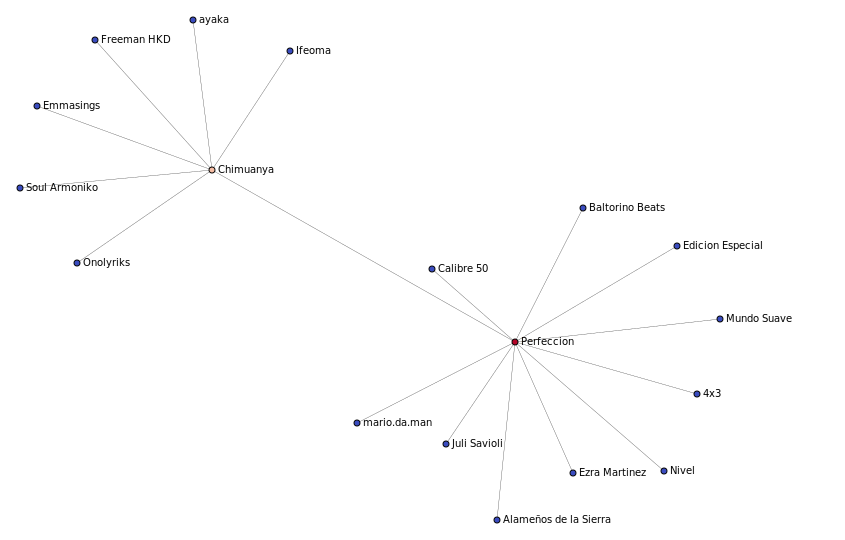

In [11]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego, radius=2)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [12]:
# you can look at the nodes in the ego network this way, to find interesting topics

nodes = sorted(G_ego.nodes)
nodes

['4x3',
 'Alameños de la Sierra',
 'Baltorino Beats',
 'Calibre 50',
 'Chimuanya',
 'Edicion Especial',
 'Emmasings',
 'Ezra Martinez',
 'Freeman HKD',
 'Ifeoma',
 'Juli Savioli',
 'Mundo Suave',
 'Nivel',
 'Onolyriks',
 'Perfeccion',
 'Soul Armoniko',
 'ayaka',
 'mario.da.man']

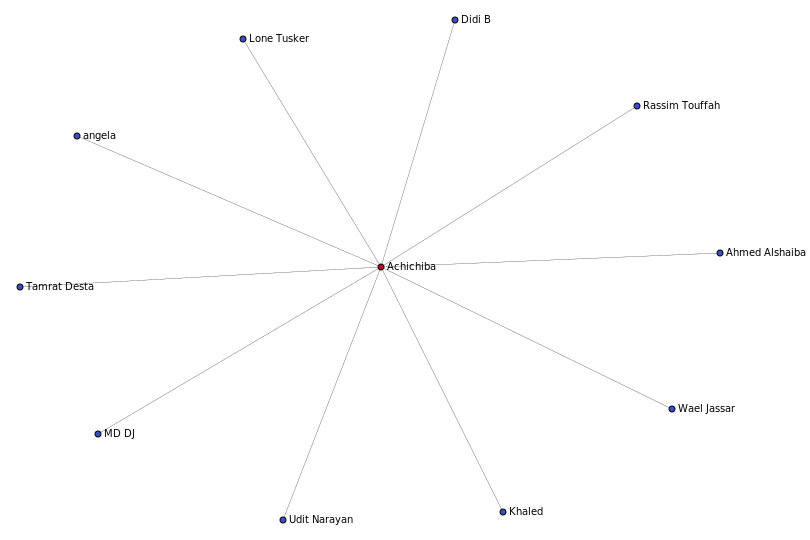

In [13]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

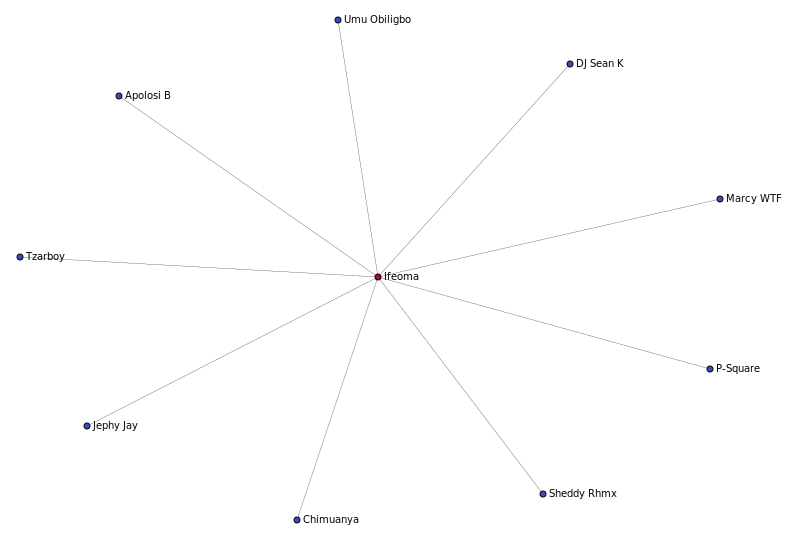

In [14]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

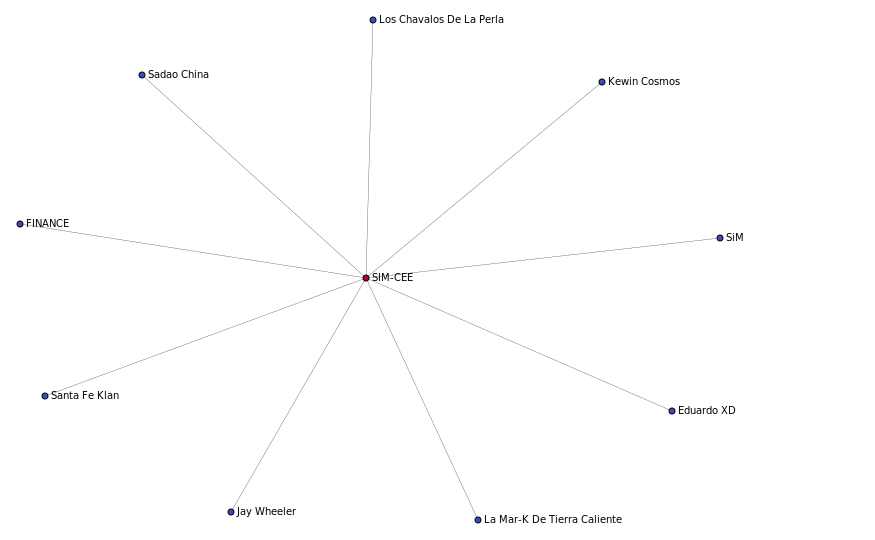

In [15]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

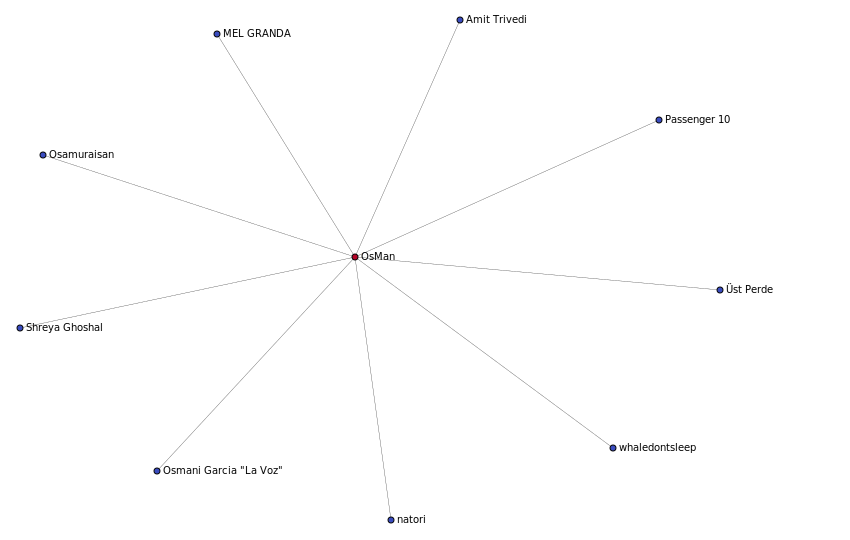

In [16]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

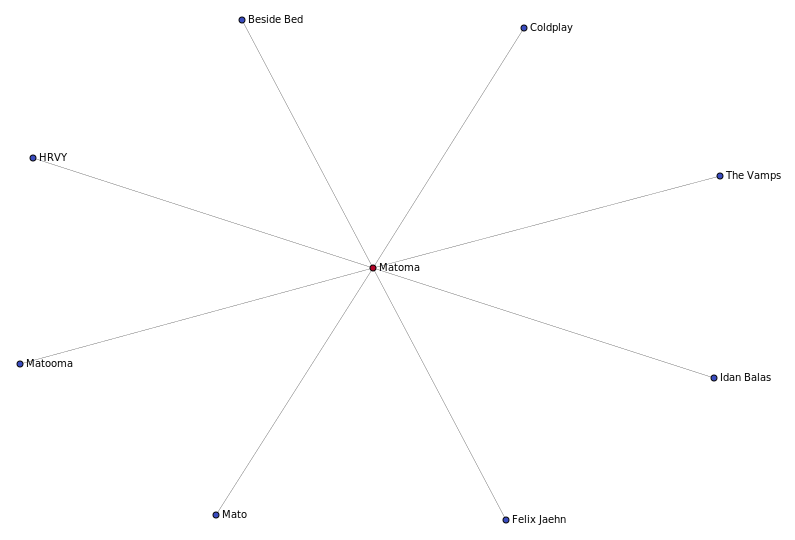

In [17]:
ego = top_nodes[5]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

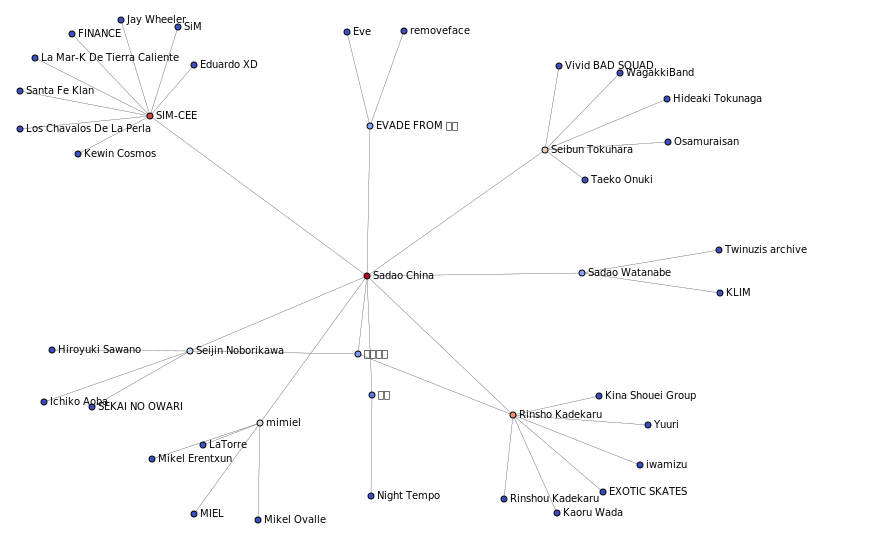

In [18]:
ego = top_nodes[6]

G_ego = nx.ego_graph(G, ego, radius=2)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

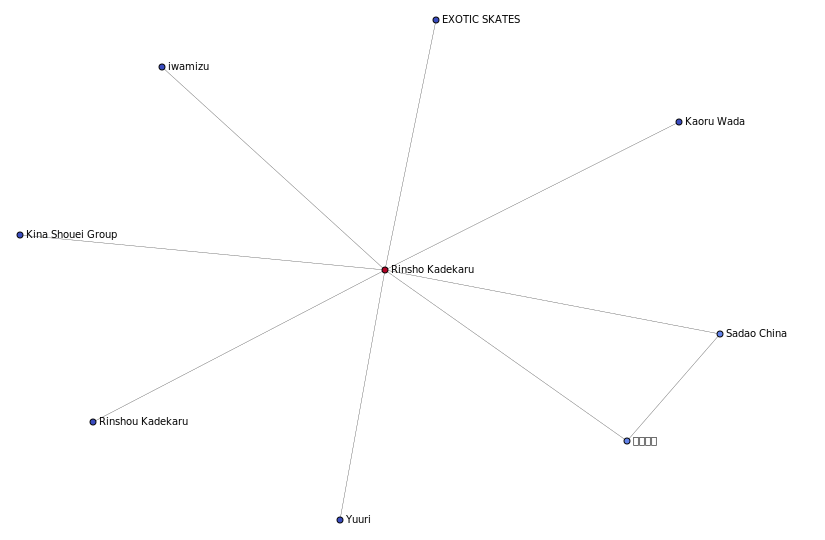

In [19]:
ego = top_nodes[7]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

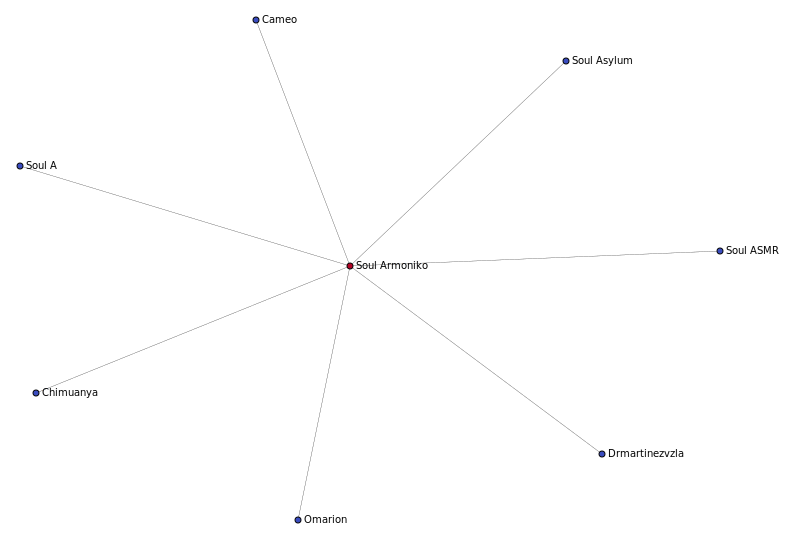

In [20]:
ego = top_nodes[8]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

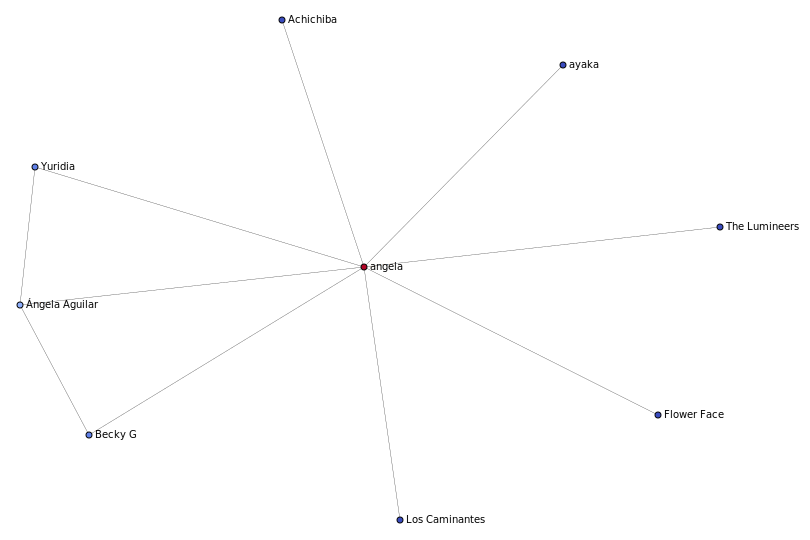

In [21]:
ego = top_nodes[9]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

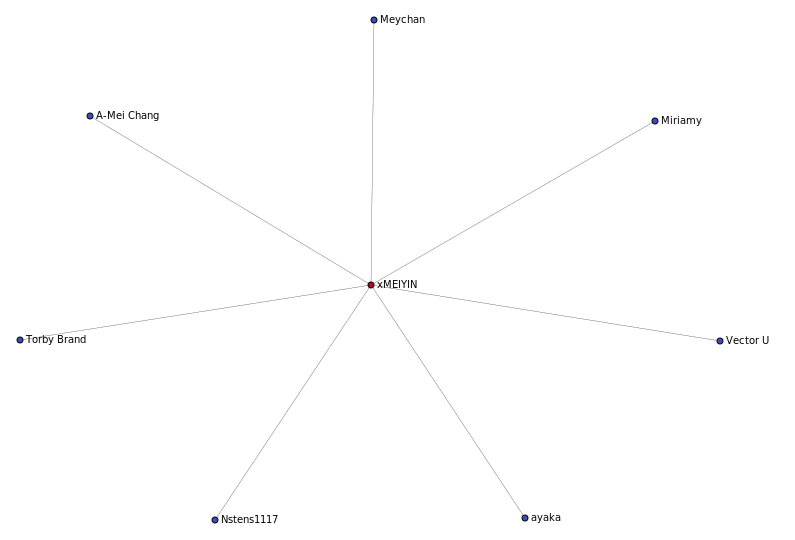

In [22]:
ego = top_nodes[10]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

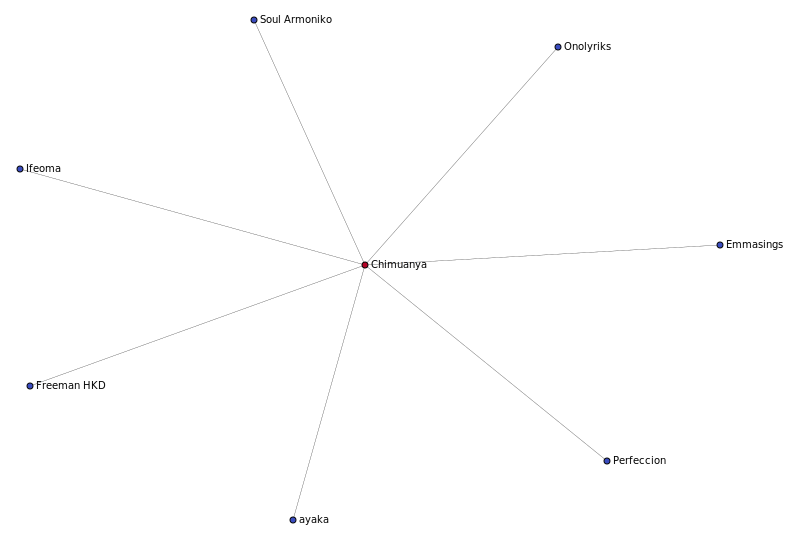

In [23]:
ego = top_nodes[11]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

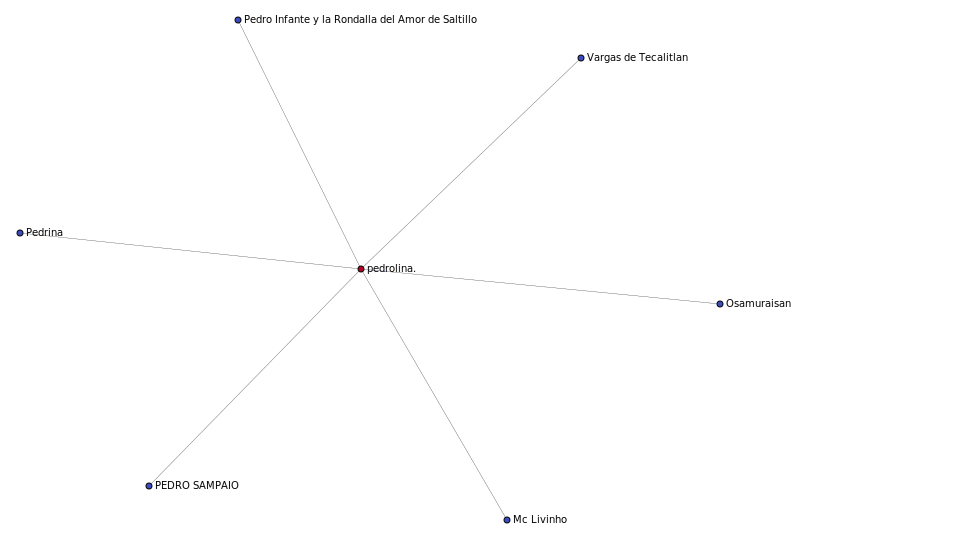

In [24]:
ego = top_nodes[12]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

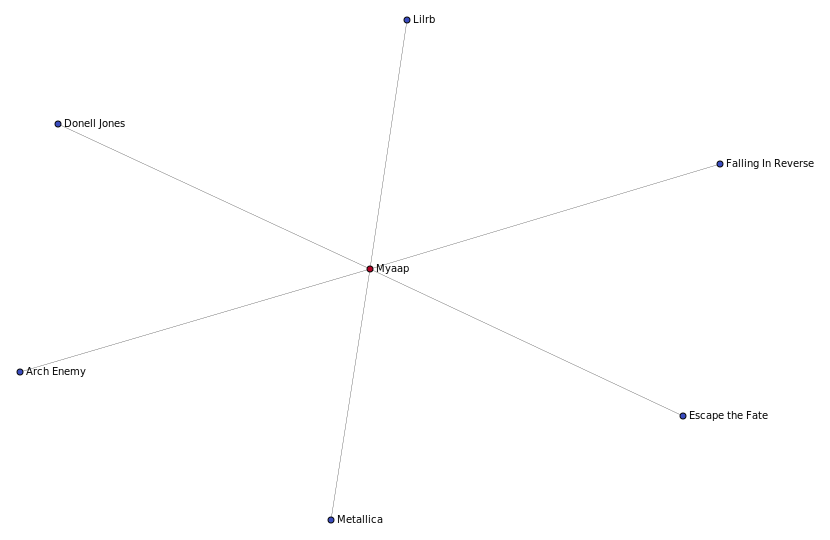

In [25]:
ego = top_nodes[13]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

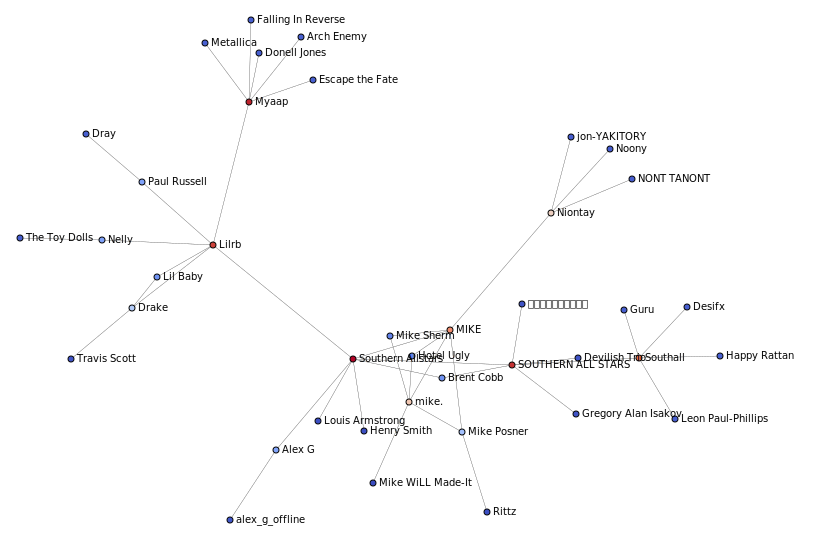

In [26]:
ego = top_nodes[14]

G_ego = nx.ego_graph(G, ego, radius=3)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

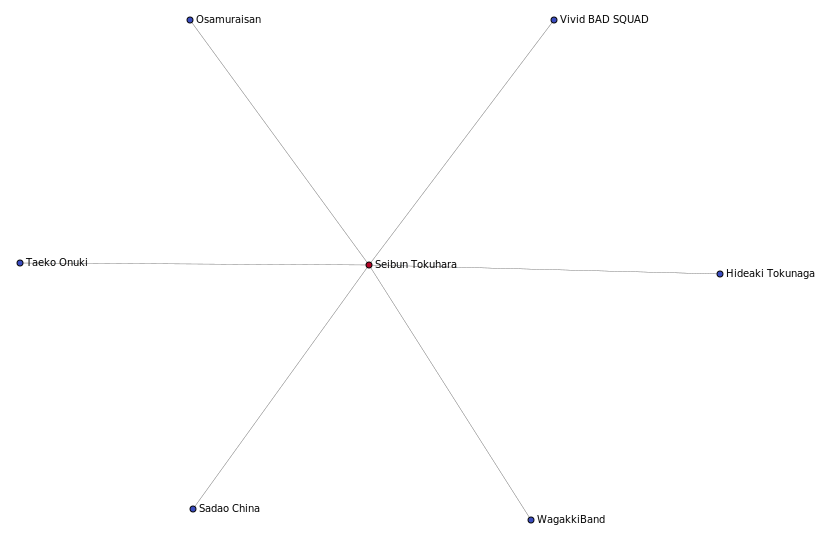

In [27]:
ego = top_nodes[15]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

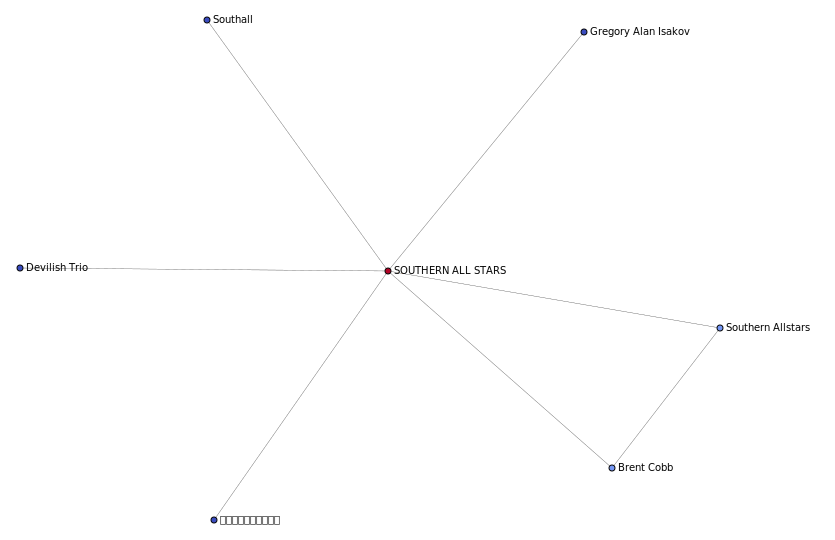

In [28]:
ego = top_nodes[16]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

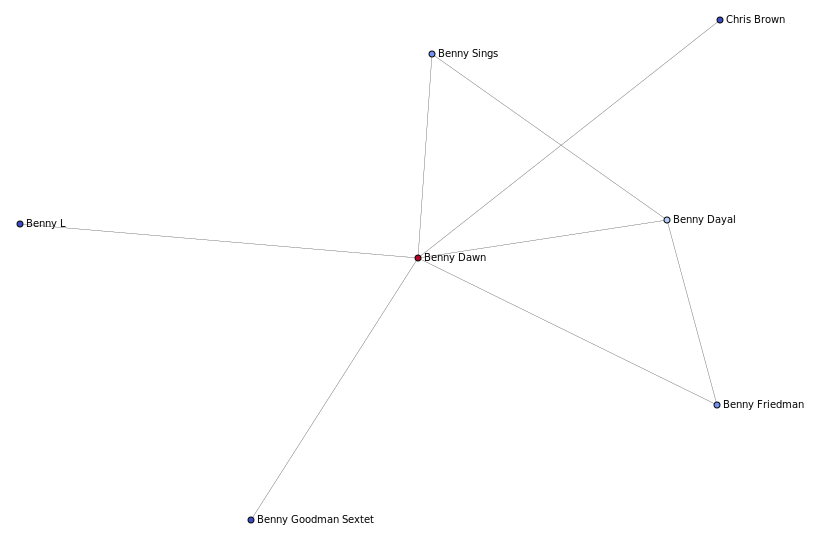

In [29]:
ego = top_nodes[17]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

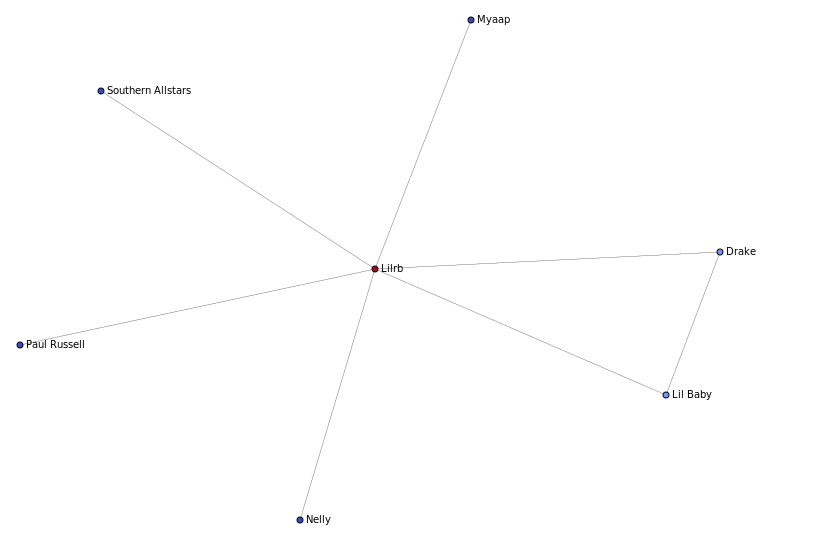

In [30]:
ego = top_nodes[18]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

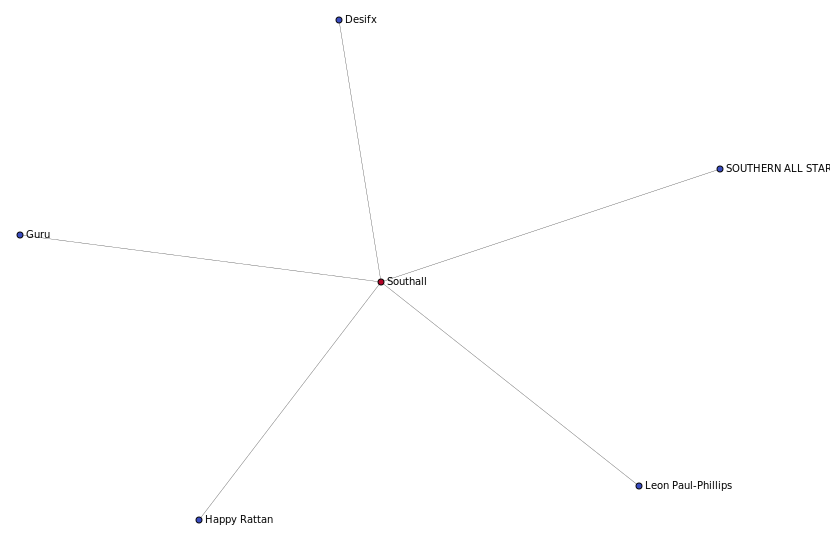

In [31]:
ego = top_nodes[19]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

# Shortest Paths

In a collaboration network, shortest paths can be interesting, to know how to get from one person to another, or one artist to another.

What in the world did Lil Wayne do with B.B. King? 

In [39]:
nx.shortest_path(G, 'B.B. King', 'Lil Wayne')

['B.B. King', 'Lil Wayne']

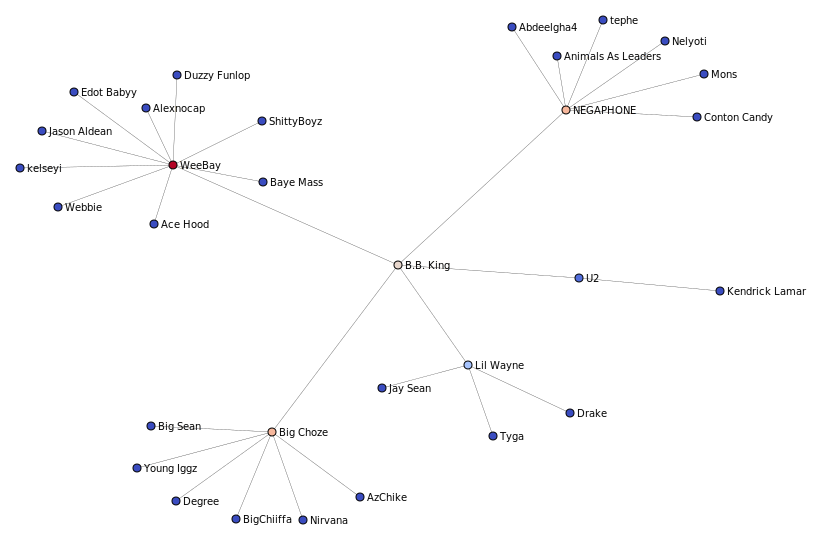

In [42]:
ego = 'B.B. King'

G_ego = nx.ego_graph(G, ego, 2)

draw_graph(G_ego, show_names=True, node_size=4, edge_width=0.3)

# Next Steps

This is a very useful tool for looking at collaboration networks in music. Some musicians do not collaborate with other musicians, so the spotify crawler returns smaller networks than the wikipedia crawler. But these are direct relationships from differerent musical collaborations, searched via the Spotify API.

Next steps are to troubleshoot this crawler. There are likely bugs, in the current state. 